
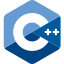
<br>

<div style="text-align:center; font-size:200%;">
 <b>GoF: Command Pattern</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 08 GoF Command Pattern.ipynb -->
<!-- slides/module_450_design_patterns/topic_230_command.cpp -->


### Zweck

Kapselung​ eines Requests als Objekt, um so die Parametrisierung von Clients
mit verschiedenen Requests, Warteschlangen- oder Logging-Operationen sowie
das Rückgängigmachen von Operationen zu ermöglichen.


### Auch bekannt als

Aktion, Transaktion


### Motivation

Kommandos in graphischen Benutzeroberflächen

- Können auf mehrere Arten aktiviert werden (Menü, Tastatur, Maus)
- Sollten oft Undo/Redo unterstützen
- Sollten geloggt werden können
- Sollten in Warteschlangen abgelegt werden können
- Sollten für Macros verwendet werden können


Mögliche Lösung: Implementierung als Objekt

- Jedes Kommando wird als Objekt implementiert
- Das Kommando-Objekt kapselt die Operation und ihre Parameter
- Das Kommando-Objekt bietet eine Methode `Execute()`, die die Operation
  ausführt


<img src="img/command_example.svg"
     style="display:block;margin:auto;width:70%"/>

In [ ]:
#include <iostream>
#include <string>

In [ ]:
class Document
{
public:
    Document(std::string text) : text_{std::move(text)} {}

    void Modify(const std::string& new_text)
    {
        std::cout << "  Document::Modify(\"" << new_text << "\")\n";
        text_ = new_text + text_;
    }
    void Append(const std::string& text)
    {
        std::cout << "  Document::Append(\"" << text << "\")\n";
        text_ += text;
    }

    std::string GetState() const { return text_; }
    void Restore(const std::string& state)
    {
        std::cout << "  Document::Restore(\"" << state << "\")\n";
        text_ = state;
    }

private:
    std::string text_;
}

In [ ]:
namespace std
{
    ostream& operator<<(ostream& os, ::Document doc)
    {
        os << doc.GetState();
        return os;
    }
}

In [ ]:
class Command
{
public:
    virtual ~Command() = default;

    virtual void Execute() = 0;
    virtual void Undo() = 0;
};

In [ ]:
int commandCounter{0};

In [ ]:
class ModifyCommand : public Command
{
public:
    ModifyCommand(Document& doc, std::string change)
        : doc_{&doc}, change_{std::move(change)}
    {}

    void Execute() override
    {
        std::cout << "ModifyCommand::Execute()\n";
        state_ = doc_->GetState();
        doc_->Modify("!" + change_ + "_" + std::to_string(counter_));
    }

    void Undo() override
    {
        std::cout << "ModifyCommand::Undo()\n";
        doc_->Restore(state_);
    }

private:
    Document* doc_;
    std::string change_;
    int counter_{++commandCounter};
    std::string state_;
};

In [ ]:
class AppendCommand : public Command
{
public:
    AppendCommand(Document& doc, std::string change)
        : doc_{&doc}, change_{std::move(change)}
    {}

    void Execute() override
    {
        std::cout << "AppendCommand::Execute()\n";
        state_ = doc_->GetState();
        doc_->Append(change_ + "_" + std::to_string(counter_) + "!");
    }

    void Undo() override
    {
        std::cout << "AppendCommand::Undo()\n";
        doc_->Restore(state_);
    }

private:
    Document* doc_;
    std::string change_;
    int counter_{++commandCounter};
    std::string state_;
};

In [ ]:
std::vector<std::unique_ptr<Command>> history;

In [ ]:
class Menu
{
public:
    Menu(Document& doc) : doc_{&doc} {}

    void ModifyDocument()
    {
        auto command{std::make_unique<ModifyCommand>(*doc_, "menu_mod")};
        command->Execute();
        history.push_back(std::move(command));
    }
    void AppendDocument()
    {
        auto command{std::make_unique<AppendCommand>(*doc_, "menu_app")};
        command->Execute();
        history.push_back(std::move(command));
    }
    void Undo()
    {
        if (history.empty())
        {
            return;
        }
        auto& last{history.back()};
        last->Undo();
        history.pop_back();
    }

private:
    Document* doc_;
};

In [ ]:
class KeyboardShortcuts
{
public:
    KeyboardShortcuts(Document& doc) : doc_{&doc} {}

    void ModifyDocument()
    {
        auto save = std::make_unique<ModifyCommand>(*doc_, "key_mod");
        save->Execute();
        history.push_back(std::move(save));
    }
    void AppendDocument()
    {
        auto save = std::make_unique<AppendCommand>(*doc_, "key_app");
        save->Execute();
        history.push_back(std::move(save));
    }
    void Undo()
    {
        if (history.empty())
        {
            return;
        }
        auto& last{history.back()};
        last->Undo();
        history.pop_back();
    }

private:
    Document* doc_;
}

In [ ]:
commandCounter = 0;
Document doc{"<<doc>>"};
Menu menu{doc};
KeyboardShortcuts shortcuts{doc};
std::cout << "  " << doc << '\n';

In [ ]:
menu.ModifyDocument();
std::cout << "  " << doc << '\n';

In [ ]:
shortcuts.ModifyDocument();
std::cout << "  " << doc << '\n';

In [ ]:
menu.AppendDocument();
std::cout << "  " << doc << '\n';

In [ ]:
std::cout << "  " << doc << '\n';
shortcuts.ModifyDocument();
std::cout << "  " << doc << '\n';

In [ ]:
shortcuts.AppendDocument();
std::cout << "  " << doc << '\n';

In [ ]:
menu.Undo();
std::cout << "  " << doc << '\n';

In [ ]:
menu.Undo();
std::cout << "  " << doc << '\n';

In [ ]:
shortcuts.Undo();
std::cout << "  " << doc << '\n';

In [ ]:
std::cout << "  " << doc << '\n';
shortcuts.ModifyDocument();
std::cout << "  " << doc << '\n';

In [ ]:
shortcuts.AppendDocument();
std::cout << "  " << doc << '\n';

In [ ]:
menu.Undo();
std::cout << "  " << doc << '\n';

In [ ]:
shortcuts.Undo();
std::cout << "  " << doc << '\n';


### Anwendbarkeit

- Parametrisierung von Objekten mit einer ausführbaren Operation
- Erzeugung und Ausführung von Operationen zu verschiedenen Zeitpunkten
- Warteschlangen von Operationen
- Undo/Redo
- Logging von Operationen
- Unterstützung von Transaktionen


### Struktur

<img src="img/pat_command.svg"
     style="display:block;margin:auto;width:70%"/>


### Teilnehmer

- **Command**
  - Deklariert ein Interface für das Ausführen einer Operation
- **ConcreteCommand**
  - Implementiert `Execute()` durch Aufruf der entsprechenden Operation(en)
    an `Receiver`
  - Definiert einen Link zwischen `Receiver` und `Action`
- **Client**
  - Erstellt ein `ConcreteCommand`-Objekt und setzt dessen `Receiver`
- **Invoker**
  - Ruft `Execute()` auf `ConcreteCommand` auf um die Anfrage auszuführen


### Sequenzendiagramm

<img src="img/pat_command_seq.svg"
     style="display:block;margin:auto;width:70%"/>


### Interaktionen

- Ein Client erstellt ein `ConcreteCommand`-Objekt und setzt dessen `Receiver`
- Ein `Invoker`-Objekt speichert das `ConcreteCommand`-Objekt
- Der `Invoker` ruft `Execute()` auf dem `ConcreteCommand`-Objekt auf.
  Falls Kommandos rückgängig gemacht werden können, speichert das
  `ConcreteCommand`-Objekt den Zustand, der benötigt wird, um die Operation
  rückgängig zu machen.
- Das `ConcreteCommand`-Objekt ruft eine oder mehrere Operationen am
  `Receiver` auf, um die Anfrage auszuführen


### Konsequenzen

- Einfache Erweiterung des Systems durch neue `ConcreteCommand`-Klassen
- Einfache Implementierung von Undo/Redo und anderen erweiterten Funktionen
- Entkopplung von `Client`, `Invoker` und `Receiver` möglich
- Zusammenfassung von Operationen in `MacroCommands` möglich


### Implementierung

- Für einfache Szenarien kann eine `SimpleCommand`-Klasse, die einen Zeiger
  auf eine Memberfunktion speichert verwendet werden
- ...

In [ ]:
class SimpleCommand : public Command
{
public:
    using Action = void (Document::*)(const std::string& new_text);

    SimpleCommand(Document& doc, Action action, std::string text)
        : doc_{&doc}, action_{action}, text_{text}
    {}

    void Execute() override
    {
        std::cout << "SimpleCommand::Execute()\n";
        state_ = doc_->GetState();
        (doc_->*action_)("!" + text_ + "_" + std::to_string(counter_) + "!");
    }

    void Undo() override
    {
        std::cout << "SimpleCommand::Undo()\n";
        doc_->Restore(state_);
    }

private:
    Document* doc_;
    Action action_;
    std::string text_;
    int counter_{++commandCounter};
    std::string state_;
};

In [ ]:
void RunSimpleAction(
    Document& doc, SimpleCommand::Action action, const std::string& text
)
{
    auto command{std::make_unique<SimpleCommand>(doc, action, text)};
    command->Execute();
    history.push_back(std::move(command));
}

In [ ]:
void Undo()
{
    if (history.empty())
    {
        return;
    }
    auto& last{history.back()};
    last->Undo();
    history.pop_back();
}

In [ ]:
history.clear();
commandCounter = 0;
Document doc{"<<doc>>"};
std::cout << "  " << doc << '\n';

In [ ]:
RunSimpleAction(doc, &Document::Modify, "mod");
std::cout << "  " << doc << '\n';

In [ ]:
RunSimpleAction(doc, &Document::Append, "app");
std::cout << "  " << doc << '\n';

In [ ]:
RunSimpleAction(doc, &Document::Modify, "mod");
std::cout << "  " << doc << '\n';

In [ ]:
Undo();
std::cout << "  " << doc << '\n';

In [ ]:
Undo();
std::cout << "  " << doc << '\n';

In [ ]:
RunSimpleAction(doc, &Document::Append, "app");
std::cout << "  " << doc << '\n';

In [ ]:
Undo();
std::cout << "  " << doc << '\n';

In [ ]:
Undo();
std::cout << "  " << doc << '\n';

In [ ]:
Undo();
std::cout << "  " << doc << '\n';


## Workshop: Command Pattern

### Szenario

Eine Bank möchte ihr Online-Banking-System verbessern. Das System soll verschiedene
Funktionen anbieten, wie Überweisungen tätigen, Daueraufträge einrichten und
Kontostände abfragen. Zusätzlich soll es möglich sein, die letzte Aktion rückgängig
zu machen, falls ein Kunde einen Fehler gemacht hat.


### Ziel

Ihre Aufgabe ist es, die Online-Banking-Operationen mit dem Command Pattern zu
implementieren. Dies soll die einfache Erweiterung des Systems in der Zukunft
ermöglichen und eine Undo-Funktion für die letzte Transaktion bereitstellen.


### Starter Code

In [ ]:
#include <iostream>
#include <string>
#include <vector>

In [ ]:
struct StandingOrder
{
    StandingOrder(double amount, std::string recipient, std::string frequency)
        : amount{amount},
          recipient{std::move(recipient)},
          frequency{std::move(frequency)}
    {}
    double amount;
    std::string recipient;
    std::string frequency;
};

In [ ]:
class Account
{
private:
    std::string account_number_;
    double balance_;
    std::vector<StandingOrder> standing_orders_;

public:
    Account(const std::string& account_number, double initial_balance)
        : account_number_(account_number), balance_(initial_balance)
    {}

    void Transfer(double amount, const std::string& recipient)
    {
        if (amount <= balance_)
        {
            balance_ -= amount;
            std::cout << "Transferred: $" << amount << " to " << recipient
                      << ". New Balance: $" << balance_ << "\n";
        }
        else
        {
            std::cout << "Insufficient funds. Current Balance: $" << balance_ << "\n";
        }
    }

    void SetupStandingOrder(
        double amount, const std::string& recipient, const std::string& frequency
    )
    {
        std::cout << "Set up standing order: $" << amount << " to " << recipient << " "
                  << frequency << "\n";
        standing_orders_.emplace_back(amount, recipient, frequency);
    }

    void CancelStandingOrder(const std::string& recipient)
    {
        auto it = std::find_if(
            standing_orders_.begin(), standing_orders_.end(),
            [&recipient](const StandingOrder& so) { return so.recipient == recipient; }
        );
        if (it != standing_orders_.end())
        {
            std::cout << "Cancelled standing order: $" << it->amount << " to "
                      << it->recipient << " " << it->frequency << "\n";
            standing_orders_.erase(it);
        }
        else
        {
            std::cout << "No standing order found for recipient: " << recipient << "\n";
        }
    }

    double GetBalance() const { return balance_; }
    std::string GetAccountNumber() const { return account_number_; }
    const std::vector<StandingOrder>& GetStandingOrders() const
    {
        return standing_orders_;
    }
};

In [ ]:
namespace std
{
ostream& operator<<(ostream& os, const ::Account& acc)
{
    os << "Account: " << acc.GetAccountNumber() << ", Balance: $" << acc.GetBalance();

    if (acc.GetStandingOrders().empty())
    {
        os << ", No Standing Orders\n";
    }
    else
    {
        os << "\n  Standing Orders:";
        for (const auto& so : acc.GetStandingOrders())
        {
            os << "\n    Amount: $" << so.amount << ", Recipient: " << so.recipient
               << ", Frequency: " << so.frequency;
        }
        os << "\n";
    }
    return os;
}
} // namespace std

In [ ]:
#include <memory> // for std::unique_ptr
#include <vector>

In [ ]:
class Command
{
public:
    virtual ~Command() = default;
    virtual void Execute() = 0;
    virtual void Undo() = 0;
};

In [ ]:
class TransferCommand : public Command
{
private:
    Account& account_;
    double amount_;
    std::string recipient_;

public:
    TransferCommand(Account& acc, double amt, const std::string& recipient)
        : account_(acc), amount_(amt), recipient_(recipient)
    {}

    void Execute() override { account_.Transfer(amount_, recipient_); }

    void Undo() override
    {
        std::cout << "Reversing transfer of $" << amount_ << " from " << recipient_
                  << ".\n";
        account_.Transfer(-amount_, "Reversal");
    }
};

In [ ]:
class SetupStandingOrderCommand : public Command
{
private:
    Account& account_;
    double amount_;
    std::string recipient_;
    std::string frequency_;

public:
    SetupStandingOrderCommand(
        Account& acc, double amt, const std::string& recipient,
        const std::string& frequency
    )
        : account_(acc), amount_(amt), recipient_(recipient), frequency_(frequency)
    {}

    void Execute() override
    {
        account_.SetupStandingOrder(amount_, recipient_, frequency_);
    }

    void Undo() override { account_.CancelStandingOrder(recipient_); }
};

In [ ]:
class OnlineBankingSystem
{
private:
    Account account_;
    std::vector<std::unique_ptr<Command>> command_history_;

public:
    OnlineBankingSystem(const std::string& account_number, double initial_balance)
        : account_(account_number, initial_balance)
    {}

    const Account& GetAccount() const { return account_; }

    void Transfer(double amount, const std::string& recipient)
    {
        auto cmd = std::make_unique<TransferCommand>(account_, amount, recipient);
        cmd->Execute();
        command_history_.push_back(std::move(cmd));
    }

    void SetupStandingOrder(
        double amount, const std::string& recipient, const std::string& frequency
    )
    {
        auto cmd = std::make_unique<SetupStandingOrderCommand>(
            account_, amount, recipient, frequency
        );
        cmd->Execute();
        command_history_.push_back(std::move(cmd));
    }

    void UndoLastTransaction()
    {
        if (!command_history_.empty())
        {
            command_history_.back()->Undo();
            command_history_.pop_back();
        }
        else
        {
            std::cout << "No transaction to undo." << std::endl;
        }
    }

    double GetBalance() const { return account_.GetBalance(); }
};

In [ ]:
OnlineBankingSystem banking("123456789", 1000);
std::cout << banking.GetAccount();

In [ ]:
banking.Transfer(100, "John Doe");
std::cout << banking.GetAccount();

In [ ]:
banking.SetupStandingOrder(50, "Electricity Company", "Monthly");
std::cout << banking.GetAccount();

In [ ]:
banking.Transfer(200, "Jane Doe");
std::cout << banking.GetAccount();

In [ ]:
std::cout << banking.GetAccount();

In [ ]:
banking.UndoLastTransaction();
std::cout << banking.GetAccount();

In [ ]:
banking.UndoLastTransaction();
std::cout << banking.GetAccount();

In [ ]:
banking.UndoLastTransaction();
std::cout << banking.GetAccount();

In [ ]:
banking.SetupStandingOrder(75, "Water Company", "Monthly");
std::cout << banking.GetAccount();

In [ ]:
banking.UndoLastTransaction();
std::cout << banking.GetAccount();